In [275]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [276]:
### Reading a netcdf file

ds = nc.Dataset('RRRAG4_Greenland_1993_2013_01_age_grid.nc')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Gridded age structure of the Greenland Ice Sheet
    original file name: Greenland_age_grid.nc
    version: 1.2
    citation: MacGregor, J.A., M.A. Fahnestock, G.A. Catania, J.D. Paden, S.P. Gogineni, S.K. Young, S.C. Rybarski, A.N. Mabrey, B.M. Wagman and M. Morlighem, 2015, Radiostratigraphy and age structure of the Greenland Ice Sheet, Journal of Geophysical Research Earth Surface, 120
    date generated: 01-Apr-2015 08:59:30
    point of contact: Joseph MacGregor, joemac@ig.utexas.edu
    grid projection: EPSG:3413
    dimensions(sizes): number of grid points in y-direction(2675), number of grid points in x-direction(1479), number of isochrones(4), number of vertical layers(25)
    variables(dimensions): float64 depth_iso(number of isochrones, number of grid points in x-direction, number of grid points in y-direction), float64 depth_iso_uncert(number of isochrones, number of gri

In [277]:
print(ds.__dict__)

{'title': 'Gridded age structure of the Greenland Ice Sheet', 'original file name': 'Greenland_age_grid.nc', 'version': '1.2', 'citation': 'MacGregor, J.A., M.A. Fahnestock, G.A. Catania, J.D. Paden, S.P. Gogineni, S.K. Young, S.C. Rybarski, A.N. Mabrey, B.M. Wagman and M. Morlighem, 2015, Radiostratigraphy and age structure of the Greenland Ice Sheet, Journal of Geophysical Research Earth Surface, 120', 'date generated': '01-Apr-2015 08:59:30', 'point of contact': 'Joseph MacGregor, joemac@ig.utexas.edu', 'grid projection': 'EPSG:3413'}


In [278]:
### Look at what dimensions are available

for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'number of grid points in y-direction', size = 2675
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of grid points in x-direction', size = 1479
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of isochrones', size = 4
<class 'netCDF4._netCDF4.Dimension'>: name = 'number of vertical layers', size = 25


In [279]:
### Look at what variables are available

for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 depth_iso(number of isochrones, number of grid points in x-direction, number of grid points in y-direction)
    description: depths of selected isochrones
    units: m
unlimited dimensions: 
current shape = (4, 1479, 2675)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 depth_iso_uncert(number of isochrones, number of grid points in x-direction, number of grid points in y-direction)
    description: depth uncertainty of selected isochrones
    units: m
unlimited dimensions: 
current shape = (4, 1479, 2675)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 age_norm(number of vertical layers, number of grid points in x-direction, number of grid points in y-direction)
    description: age at ice-thickness-normalized depths, evenly spaced vertically
    units: yr
unlimited dimensions: 
current shape = (25, 1479, 2675)
filling on, defaul

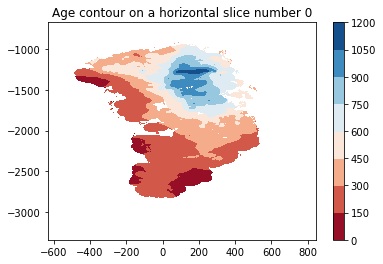

In [280]:
%matplotlib inline
### Plot age
age_layer_number = 0
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
age = ds.variables['age_norm'][:][age_layer_number,:,:]

#plt.rcParams['figure.figsize'] = [15, 15]
plt.contourf(x,y,age.T)
plt.colorbar()
plt.title("Age contour on a horizontal slice number " + str(age_layer_number))
plt.show()

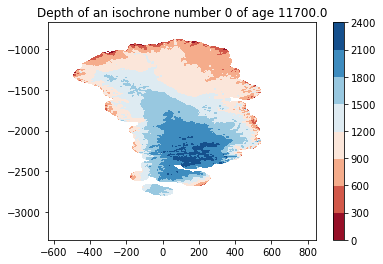

In [281]:
### Depth of an iscohrone provided in the data
isochrone_number = 0
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
depth_iso = ds.variables['depth_iso'][:][isochrone_number,:,:]
age_iso = ds.variables['age_iso'][:][isochrone_number]

plt.contourf(x,y,depth_iso.T)
plt.colorbar()
plt.title("Depth of an isochrone number " + str(isochrone_number) + " of age " + str(age_iso))
plt.show()

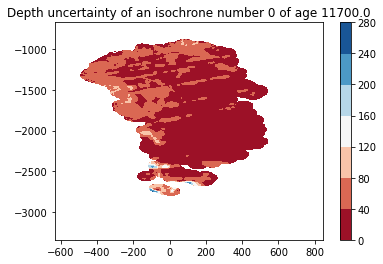

In [282]:
### Depth uncertainty of an iscohrone provided in the data
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
depth_iso_uncert = ds.variables['depth_iso_uncert'][:][isochrone_number,:,:]

plt.contourf(x,y,depth_iso_uncert.T)
plt.colorbar()
plt.title("Depth uncertainty of an isochrone number " + str(isochrone_number) + " of age " + str(age_iso))
plt.show()

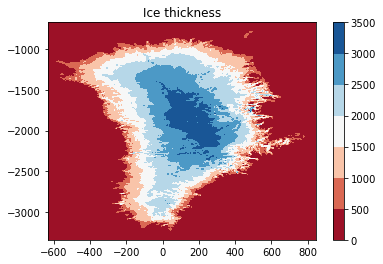

In [283]:
x = ds.variables['x'][:][:,0]
y = ds.variables['y'][:][0,:]
h = ds.variables['thick'][:][:,:]

plt.contourf(x,y,h.T)
plt.colorbar()
plt.title("Ice thickness")
plt.show()

In [284]:
### Reading a netcdf file

df = nc.Dataset('v5_grl20_ss25ka0003.nc')

zb = np.asarray(df.variables['zb'])

In [285]:
from scipy.spatial import distance

def closest_point(modelpoint, datapoints):
    closest_index = distance.cdist([modelpoint], datapoints).argmin()
    return datapoints[closest_index], closest_index

In [286]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
polygon = Polygon([(0, -3250000), (100000,-3250000), (250000, -2900000), (800000,-2200000), (550000,-1000000), (200000, -700000),(0, -720000),(-300000, -900000),(-550000, -1200000), (-250000, -2500000), (-280000, -2900000), (-200000, -3100000)])

In [287]:
def get_nearest_index(component, grid_component, level = 1):
    indices = []
    ii = np.argmin(np.abs(component - grid_component))

    if ii == 0 and component < grid_component[0]:

        indices.append(0)
    elif ii == len(grid_component) - 1 and component > grid_component[-1]:

        indices.append(len(grid_component) - 1)
        
    elif ii > len(grid_component) - 1 - level:

        for j in range(-level, 1):
            indices.append(ii + j)
        for j in range(ii+1, len(grid_component)):
            indices.append(j)
        
    elif ii < level:

        for j in range(ii):
            indices.append(j)
        for j in range(level+1):
            indices.append(ii + j)
            
    else:
        
        for j in range(-level, level+1):
            indices.append(ii + j)      
    
    return indices

def nearest_neighbor_interpolation_one_point(point, x_datagrid, y_datagrid, h_datagrid, field):
    point_polygon_datastructure = Point(point[2], point[1])

    if polygon.contains(point_polygon_datastructure):
        
        x_indexes = get_nearest_index(point[2], x_datagrid)
        y_indexes = get_nearest_index(point[1], y_datagrid)

        list_of_points_to_check = []
        values = []

        for xi in x_indexes:
            for yi in y_indexes:

                z_indexes = get_nearest_index(point[0], h_datagrid[xi, yi]*np.arange(25)/24)

                for zi in z_indexes:

                    if ~np.isnan(field[zi, xi, yi]):
                        list_of_points_to_check.append(np.array([h_datagrid[xi, yi]*zi/24, y_datagrid[yi], x_datagrid[xi]]))
                        values.append(field[zi, xi, yi])

        if list_of_points_to_check:

            nearest_point, index = closest_point(point, list_of_points_to_check)
            return values[index]

        else: 

            x_indexes = get_nearest_index(point[2], x_datagrid, level = 5)
            y_indexes = get_nearest_index(point[1], y_datagrid, level = 5)

            list_of_points_to_check = []
            values = []

            for xi in x_indexes:
                for yi in y_indexes:

                    z_indexes = get_nearest_index(point[0], h_datagrid[xi, yi]*np.arange(25)/24, level = 5)

                    for zi in z_indexes:

                        if ~np.isnan(field[zi, xi, yi]):
                            list_of_points_to_check.append(np.array([h_datagrid[xi, yi]*zi/24, y_datagrid[yi], x_datagrid[xi]]))
                            values.append(field[zi, xi, yi])

            if list_of_points_to_check:

                nearest_point, index = closest_point(point, list_of_points_to_check)
                return values[index]

            else:
                return np.nan
    
    else: return np.nan

In [288]:
### Reading a netcdf file

df = nc.Dataset('v5_grl20_ss25ka0003.nc')

for var in df.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int8 mapping()
    grid_mapping_name: polar_stereographic
    semi_major_axis: 6378137.0
    inverse_flattening: 298.257223563
    latitude_of_projection_origin: 90.0
    standard_parallel: 70.0
    straight_vertical_longitude_from_pole: -45.0
    false_easting: 0.0
    false_northing: 0.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -127 ignored
<class 'netCDF4._netCDF4.Variable'>
float32 time()
    units: a
    standard_name: time
    long_name: Time
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 delta_ts()
    units: degC
    standard_name: surface_temperature_anomaly
    long_name: Surface temperature anomaly
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 z_sl()
    units: m
    standard_name: global_average_sea_level_c

In [289]:
df

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Time-slice output no. 0003 of simulation v5_grl20_ss25ka
    institution: Institute of Low Temperature Science, Hokkaido University, Sapporo, Japan
    source: SICOPOLIS Version 5.1
    history: 2021-06-14 15:18:20 -07:00 - Data produced
    references: http://www.sicopolis.net/
    dimensions(sizes): x(85), y(145), zeta_c(81), zeta_t(11), zeta_r(41)
    variables(dimensions): int8 mapping(), float32 time(), float32 delta_ts(), float32 z_sl(), float32 V_tot(), float32 V_af(), float32 A_grounded(), float32 A_floating(), float32 x(x), float32 y(y), float32 sigma_level_c(zeta_c), float32 sigma_level_t(zeta_t), float32 sigma_level_r(zeta_r), float32 lon(y, x), float32 lat(y, x), float32 lambda(y, x), float32 phi(y, x), float32 temp_maat(y, x), float32 temp_s(y, x), float32 prec(y, x), float32 snowfall(y, x), float32 rainfall(y, x), float32 pdd(y, x), float32 as_perp(y, x), float32 as

In [290]:
x = ds.variables['x'][:][:,0]*1000
y = ds.variables['y'][:][0,:]*1000
h = ds.variables['thick'][:][:,:]
age = ds.variables['age_norm'][:][:,:,:]

In [291]:
zb = np.asarray(df.variables['zb'])
H_t = np.asarray(df.variables['H_temp'])
H_c = np.asarray(df.variables['H_cold'])
H = np.asarray(df.variables['H'])
zs = np.asarray(df.variables['zs'])
age_c = np.asarray(df.variables['age_c'])
age_t = np.asarray(df.variables['age_t'])
x_model = np.asarray(df.variables['x'])
y_model = np.asarray(df.variables['y'])
maske = np.asarray(df.variables['maske'])
maske_old = np.asarray(df.variables['maske_old'])
tau_b_driving = np.asarray(df.variables['tau_b_driving'])
tau_b_drag = np.asarray(df.variables['tau_b_drag'])
snowfall = np.asarray(df.variables['snowfall'])
temp_s = np.asarray(df.variables['temp_s'])
temp_maat = np.asarray(df.variables['temp_maat'])
prec = np.asarray(df.variables['prec'])
rainfall = np.asarray(df.variables['rainfall'])
vx_c = np.asarray(df.variables['vx_c'])


In [292]:
age_data_interp = np.zeros((age_c.shape[0]+age_t.shape[0]-1, len(y_model), len(x_model)))
z_model_grid = np.zeros((age_c.shape[0]+age_t.shape[0]-1, len(y_model), len(x_model)))

In [111]:
count = 0 
for i in range(age_data_interp.shape[0]):
    for j in range(len(y_model)):
        for k in range(len(x_model)):
            if (i < age_t.shape[0]):
                z = H_t[j,k]*i/(age_t.shape[0]-1)
            else:
                z = H_t[j,k] + H_c[j,k]* (i-age_t.shape[0]+1)/(age_c.shape[0]-1) 
                
            z_model_grid[i,j,k] = z
            count = count + 1
            if (count % 100000 == 0):
                print(count)
            age_data_interp[i,j,k] = nearest_neighbor_interpolation_one_point([z, y_model[j], x_model[k]], x, y, h, age[::-1])

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [201]:
# 288834
np.count_nonzero(~np.isnan(age_data_interp))

1121575

Text(0.5, 1.0, 'Model ice thickness')

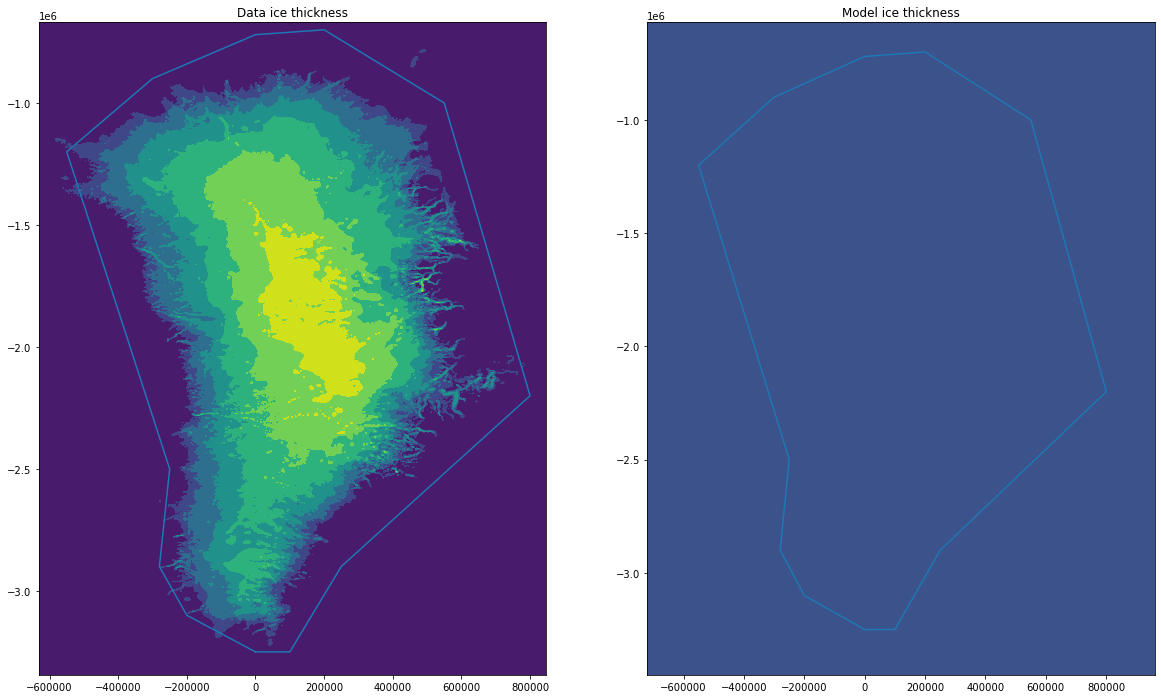

In [202]:
plt.rcParams['figure.figsize'] = [20,12]
fig, ax = plt.subplots(1,2)
x_poly, y_poly = polygon.exterior.xy

ax[0].plot(x_poly,y_poly)
ax[0].contourf(x, y, h.T)
ax[0].set_title("Data ice thickness")
#ax[0].colorbar()

ax[1].plot(x_poly,y_poly)
ax[1].contourf(x_model, y_model, z_model_grid[-1])
ax[1].set_title("Model ice thickness")
#ax[1].colorbar()

Text(0.5, 1.0, 'Model age cold ice layer 2')

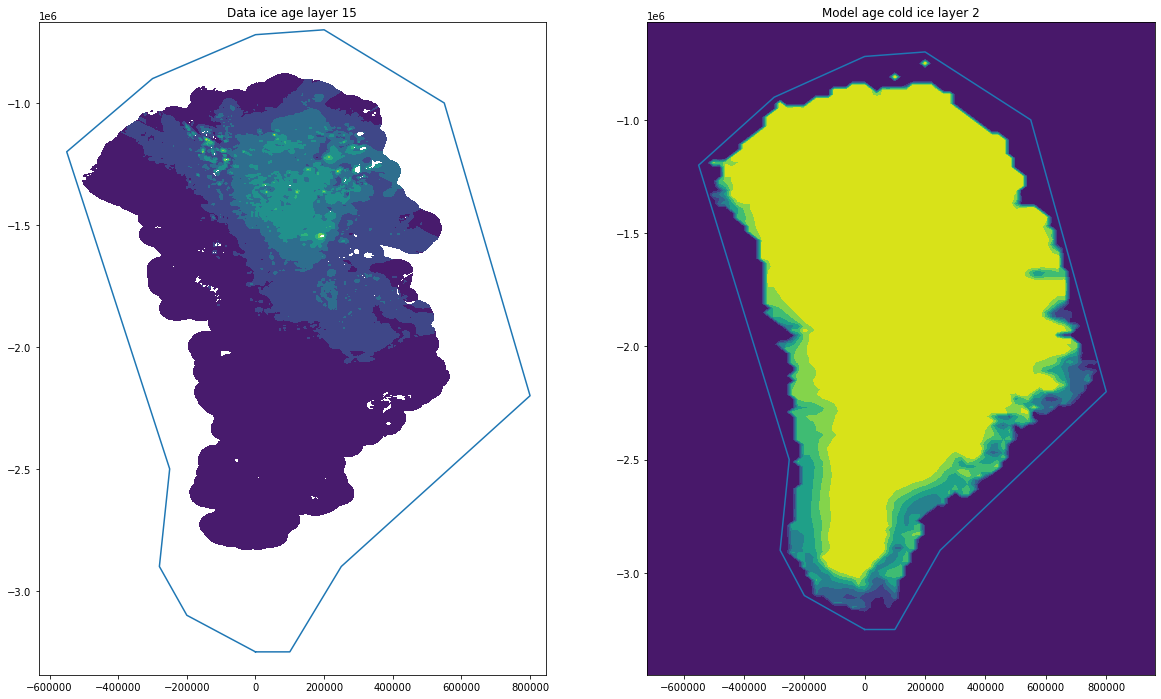

In [203]:
plt.rcParams['figure.figsize'] = [20,12]
fig, ax = plt.subplots(1,2)
x_poly, y_poly = polygon.exterior.xy

layer = 15
x_poly, y_poly = polygon.exterior.xy
age = ds.variables['age_norm'][:][layer,:,:]
ax[0].plot(x_poly,y_poly)
ax[0].contourf(x, y, age.T)
ax[0].set_title(f"Data ice age layer {layer}")
#ax[0].colorbar()

ax[1].plot(x_poly,y_poly)
ax[1].contourf(x_model, y_model, age_c[cold_ice_layer,:,:])
#ax[1].colorbar()
ax[1].set_title(f"Model age cold ice layer {cold_ice_layer}")

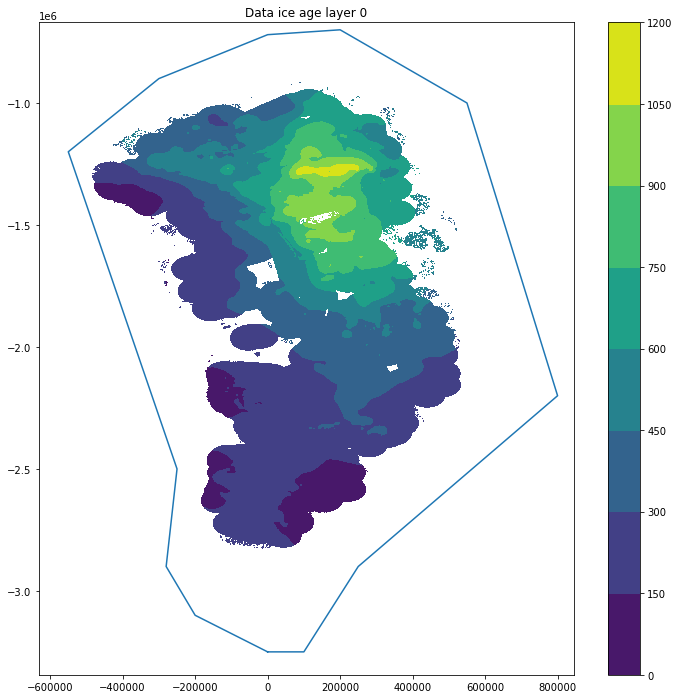

In [204]:
plt.rcParams['figure.figsize'] = [12,12]
layer = 0
x_poly, y_poly = polygon.exterior.xy
age = ds.variables['age_norm'][:][layer,:,:]
plt.plot(x_poly,y_poly)
plt.contourf(x, y, age.T)
plt.title(f"Data ice age layer {layer}")
plt.colorbar()

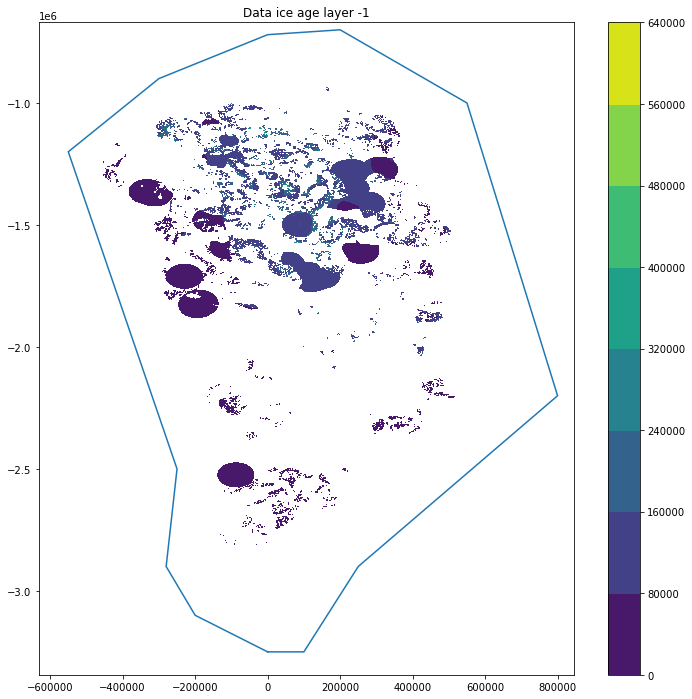

In [205]:
plt.rcParams['figure.figsize'] = [12,12]
layer = -1
x_poly, y_poly = polygon.exterior.xy
age = ds.variables['age_norm'][:][layer,:,:]
plt.plot(x_poly,y_poly)
plt.contourf(x, y, age.T)
plt.title(f"Data ice age layer {layer}")
plt.colorbar()

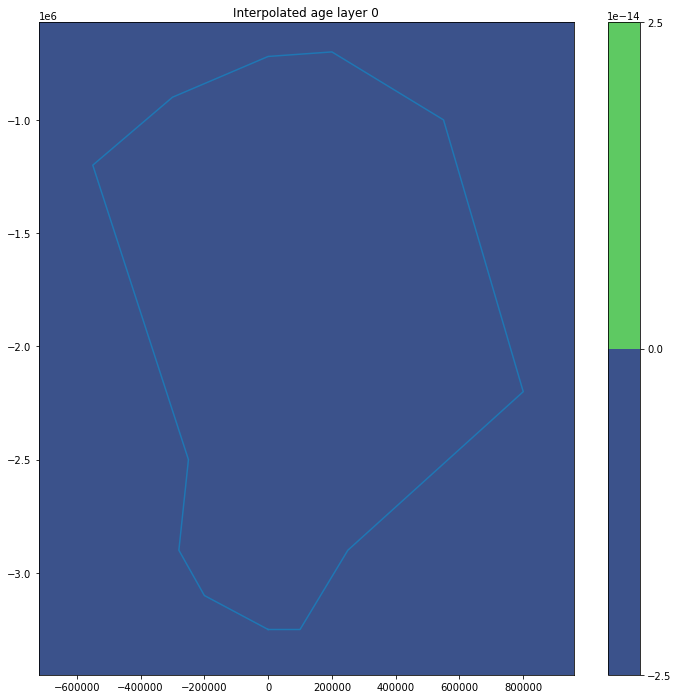

In [206]:
layer = 0
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model,y_model,age_data_interp[layer,:,:])
plt.title(f"Interpolated age layer {layer}")
plt.colorbar()
plt.show()

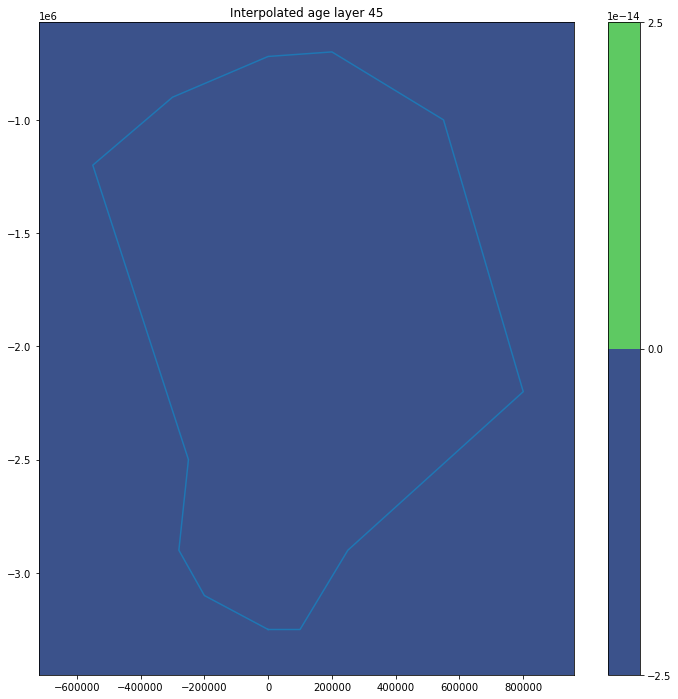

In [207]:
layer = 45
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model,y_model,age_data_interp[layer,:,:])
plt.title(f"Interpolated age layer {layer}")
plt.colorbar()
plt.show()

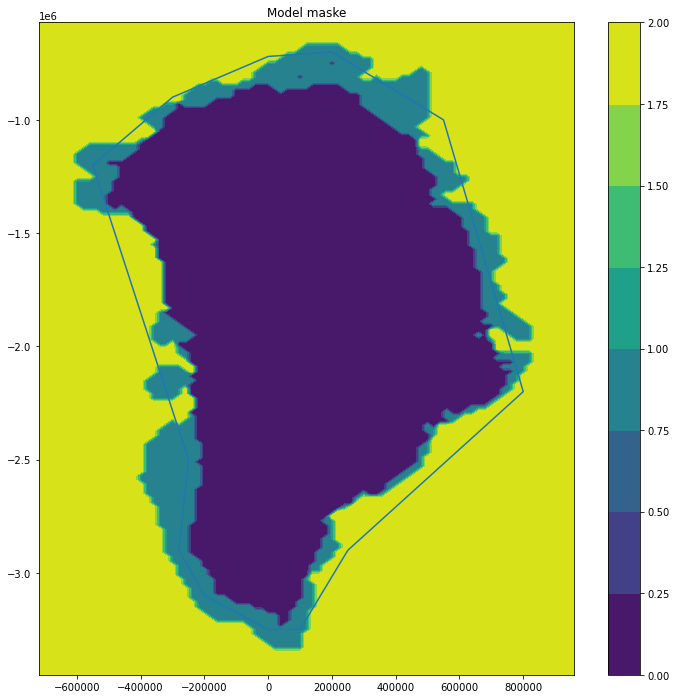

In [208]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, maske)
plt.title("Model maske")
plt.colorbar()

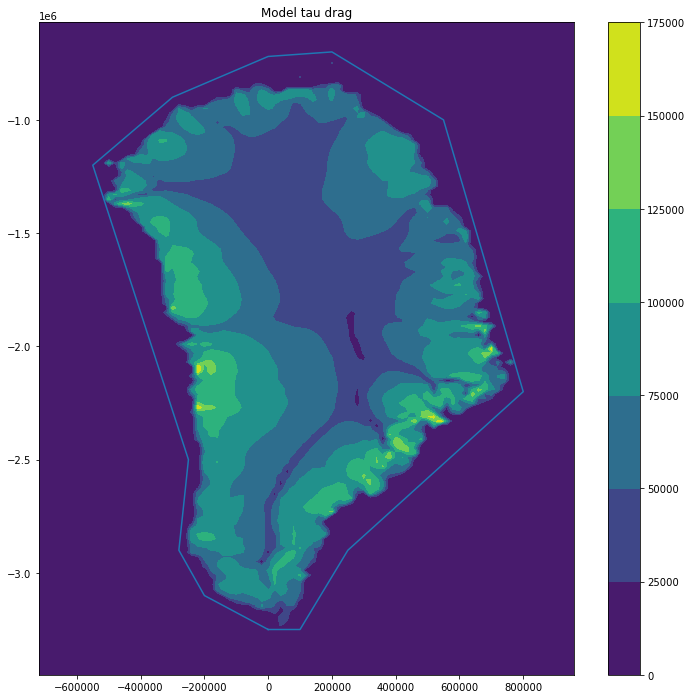

In [209]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, tau_b_drag)
plt.title("Model tau drag")
plt.colorbar()

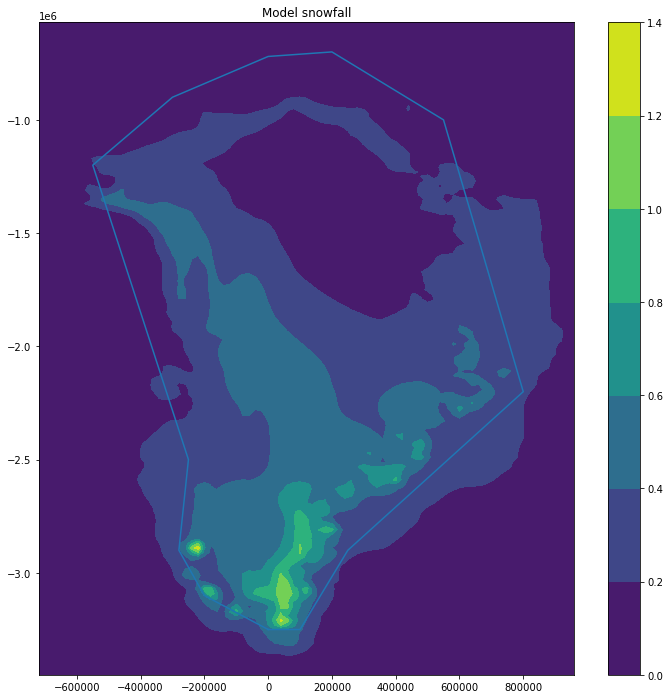

In [210]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, snowfall)
plt.title("Model snowfall")
plt.colorbar()

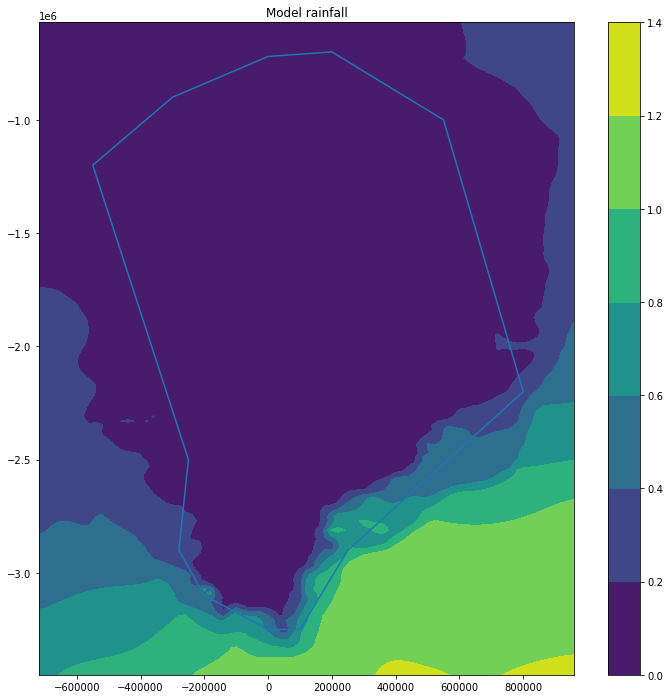

In [211]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, rainfall)
plt.title("Model rainfall")
plt.colorbar()

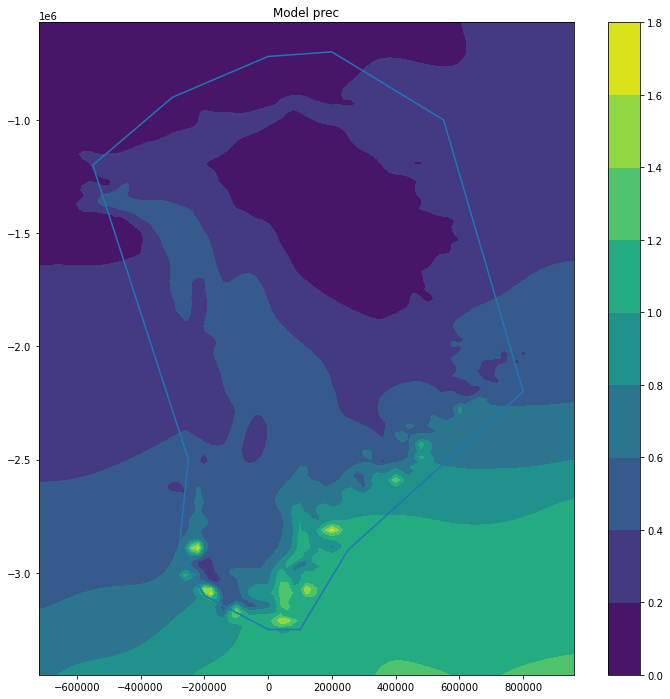

In [212]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, prec)
plt.title("Model prec")
plt.colorbar()

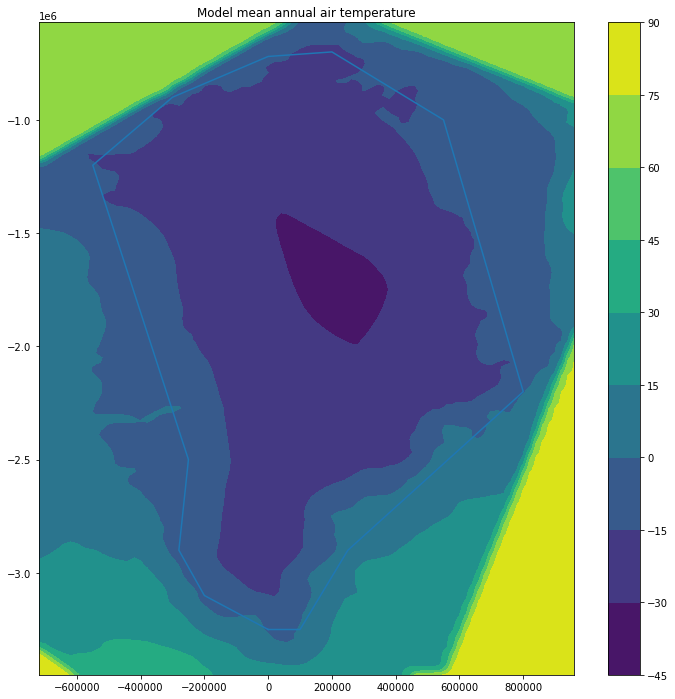

In [213]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, temp_maat)
plt.title("Model mean annual air temperature")
plt.colorbar()

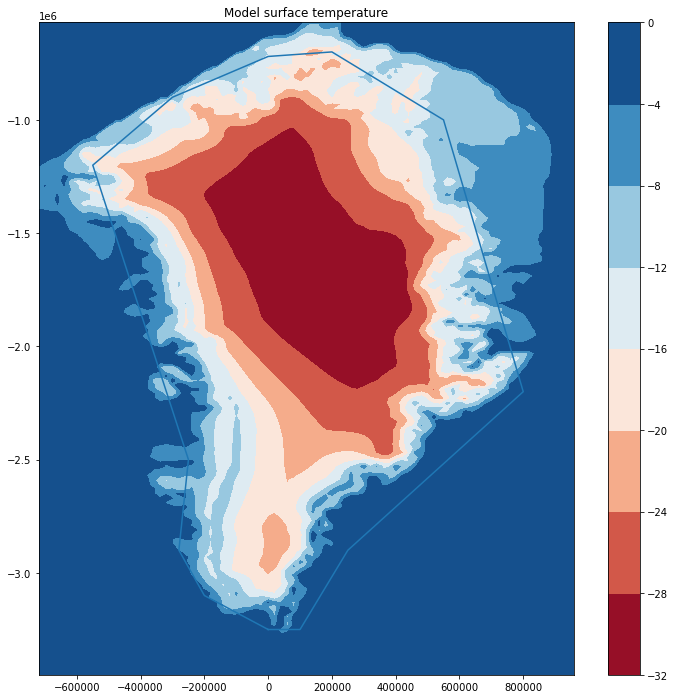

In [273]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, temp_s)
plt.title("Model surface temperature")
plt.colorbar()

3152.6685

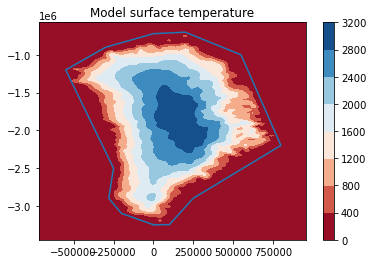

In [293]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, H_c)
plt.title("Model surface temperature")
plt.colorbar()

np.max(H_c)

<ipython-input-294-5d2e8f64e5b2>:3: RuntimeWarning: divide by zero encountered in log
  plt.contourf(x_model, y_model, np.log(np.abs(vx_c[24])), levels = 50)


926.11426

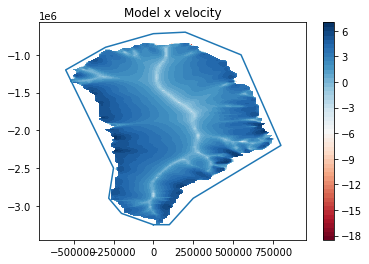

In [294]:
x_poly, y_poly = polygon.exterior.xy
plt.plot(x_poly,y_poly)
plt.contourf(x_model, y_model, np.log(np.abs(vx_c[24])), levels = 50)
plt.title("Model x velocity")
plt.colorbar()
np.max(vx_c[40])

In [265]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


def get_cmap_rgb(cmap, n_colors=256):
    """Enter a matplotlib colormap name, return rgb array
    Parameters
    ----------
    cmap : str or colormap object
        if matplotlib color, should be string to make sure
        n_colors is selected correctly. If cmocean, pass the object
        e.g.
            matplotlib :  get_cmap_rgb('viridis',10)
            cmocean : get_cmap_rgb(cmocean.cm.thermal,10)
    n_colors : int, optional
        number of color levels in color map
    """

    return cm.get_cmap(cmap,n_colors)(range(n_colors))

def plot_normal(x, y, data, 
				cmap = 'RdBu', nbins = 100, 
				fig= None, ax=None,
				cbar_label = None, 
				**kwargs):
	
	"""
	x : 1D array of x-axis co-ordinates
	y : 1D array of y-axis co-ordinates
	data : The field that gets plotted, a 2D array
	fig : matplotlib.figure, optional
    ax : matplotlib.axes, optional
        to make plot at
    cmap : str, optional
        specifies colormap
    cbar_label : str, optional
        label for colorbar, default grabs units from DataArray
    kwargs
        passed to matpotlib.pyplot.contourf
    Returns
    -------
    ax : matplotlib.axes
        if one is not provided
    """

	return_ax = False
	if ax is None:
		fig, ax = plt.subplots()
		return_ax = True

	### fig is like the paper
	### ax is like a particular figure on a paper
	### when you use plt.plot() it implicitly creates a figure and axis by itself. 
	
	im = ax.contourf(x, y, data, nbins, cmap = plt.set_cmap(cmap), **kwargs)

	### Locate ax and apend axis cax to it
	divider = make_axes_locatable(ax)
	cax = divider.append_axes('right', size='5%', pad=0.05)

	### Mount colorbar on cax
	fig.colorbar(im, cax=cax)

	if return_ax:
		return ax

def plot_log(x, y, data, 
			nbins=None, bin_edges=None,
			cmap = 'RdBu_r', 
			fig= None, ax=None,
			cbar_label = None, 
			**kwargs):

	"""
	x : 1D array of x-axis co-ordinates
	y : 1D array of y-axis co-ordinates
	data : The field that gets plotted, a 2D array
    nbins : int, optional
        number of colored bin (centers) positive and negative values
        i.e. we get 2*nbins+1, bins. one is neutral (middle)
    bin_edges : array-like, optional
        exclusive with nbins, specify bin edges (positive only)
    fig : matplotlib.figure, optional
    ax : matplotlib.axes, optional
        to make plot at
    cmap : str, optional
        specifies colormap
    cbar_label : str, optional
        label for colorbar, default grabs units from DataArray
    kwargs
        passed to matpotlib.pyplot.contourf
    Returns
    -------
    ax : matplotlib.axes
        if one is not provided
    """

	return_ax = False
	if ax is None:
		fig, ax = plt.subplots()
		return_ax = True	
	if nbins is not None and bin_edges is not None:
		raise TypeError('one or the other')

	log = np.log10(np.abs(data))
	log = np.where((~np.isnan(log)) & (~np.isinf(log)), log, 0.)
    
	if nbins is not None:
		_,bin_edges = np.histogram(log,bins=nbins)
	else:
		nbins = len(bin_edges)-1

	logbins=np.round(bin_edges)

	# determine if colorbar will be extended
	maxExtend = np.any((data>10**logbins[-1]))
	minExtend = np.any((data<-10**logbins[-1]))
	extend='neither'
	if minExtend and maxExtend:
	    extend='both'
	elif maxExtend:
	    extend='max'
	elif minExtend:
	    extend='min'
	# determine number of colors, adding one for each extension
	# and always one extra, the middle color bin
	ncolors=2*nbins+1
	ncolors = ncolors+1 if maxExtend else ncolors
	ncolors = ncolors+1 if minExtend else ncolors
	# if only one end is extended,
	# chop off the extreme value from the other end to fit
	# in the middle (neutral) colorbin
	if extend in ['min' ,'max']:
		cmap = get_cmap_rgb(cmap,ncolors+1)
		bot =  np.arange(1,nbins+1) if extend=='max' else np.arange(0,nbins+1)
		top = np.arange(ncolors-nbins,ncolors) if extend=='min' else np.arange(ncolors-nbins,ncolors+1)
		index = list(bot)+[nbins+1]+list(top)
		cmap = cmap[index,:]
	else:
		cmap=get_cmap_rgb(cmap,ncolors)

	# levels and plot
	levels=10**logbins
	levels = np.concatenate([-levels[::-1],levels],axis=0)
	im=ax.contourf(x, y, data, levels=levels, colors=cmap, extend=extend, **kwargs)

	### Locate ax and apend axis cax to it
	divider = make_axes_locatable(ax)
	cax = divider.append_axes('right', size='5%', pad=0.05)

	### Mount colorbar on cax
	colorbar = fig.colorbar(im, cax=cax)

	if cbar_label is not None:
		colorbar.set_label(str(cbar_label))
	else:
		colorbar.set_label("Color scheme")

	ticklabels = [f'-10^{b:.0f}' for b in logbins[::-1]]
	ticklabels += [f'10^{b:.0f}' for b in logbins]
	colorbar.set_ticklabels(ticklabels)

	if return_ax:
		return ax



<ipython-input-271-126349ac0638>:3: RuntimeWarning: divide by zero encountered in log
  plot_normal(x_model,y_model,np.log(np.abs(vx_c[24])), nbins =15, fig = fig, ax = ax)


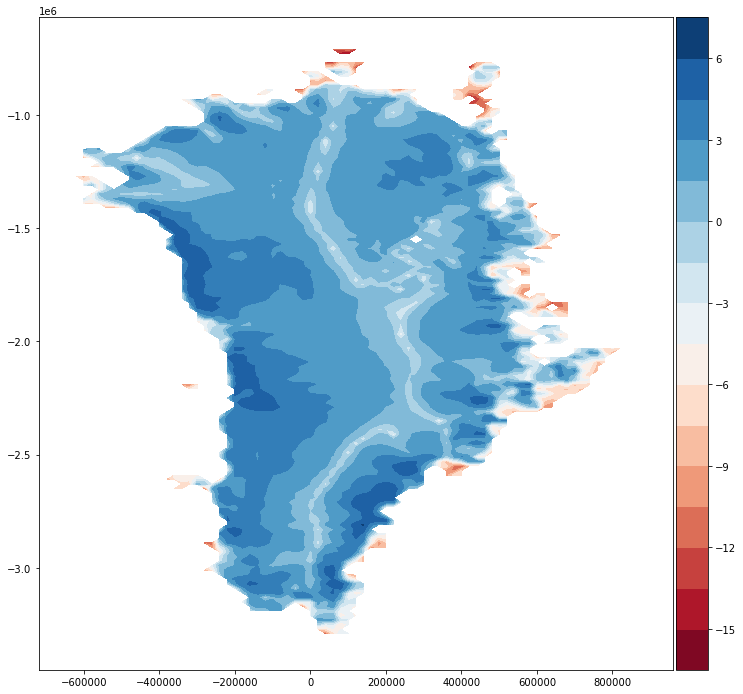

In [271]:
plt.rcParams['figure.figsize'] = [12,12]
fig, ax = plt.subplots()
plot_normal(x_model,y_model,np.log(np.abs(vx_c[24])), nbins =15, fig = fig, ax = ax)